In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [172]:
clean_data = data
clean_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [173]:
#Removing Unused Data
clean_data = clean_data.drop('Serial No.', axis=1)
clean_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [174]:
#Check if data is null
print(pd.isnull(clean_data).sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [175]:
#Data Description
clean_data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [176]:
#Chance Of Admit According to Research
chance_admit_research = clean_data[['Research', 'Chance of Admit ']].groupby(['Research'], as_index=False).mean()
chance_admit_research

,Research,Chance of Admit
0,0,0.637680
1,1,0.795982


Text(0, 0.5, 'Chance Of Admit')

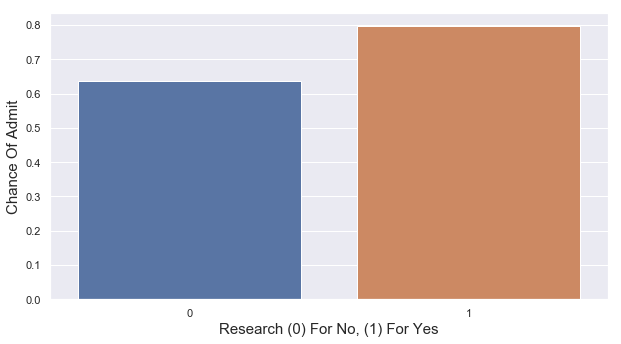

In [177]:
sns.barplot(x="Research", y="Chance of Admit ", data=chance_admit_research)
plt.xlabel('Research (0) For No, (1) For Yes', fontsize=15)
plt.ylabel('Chance Of Admit', fontsize=15)

In [178]:
#Chance Of Admit According to Research
chance_admit_cgpa = clean_data[['CGPA', 'Chance of Admit ']].groupby(['CGPA'], as_index=False).mean()

Text(0, 0.5, 'Chance Of Admit')

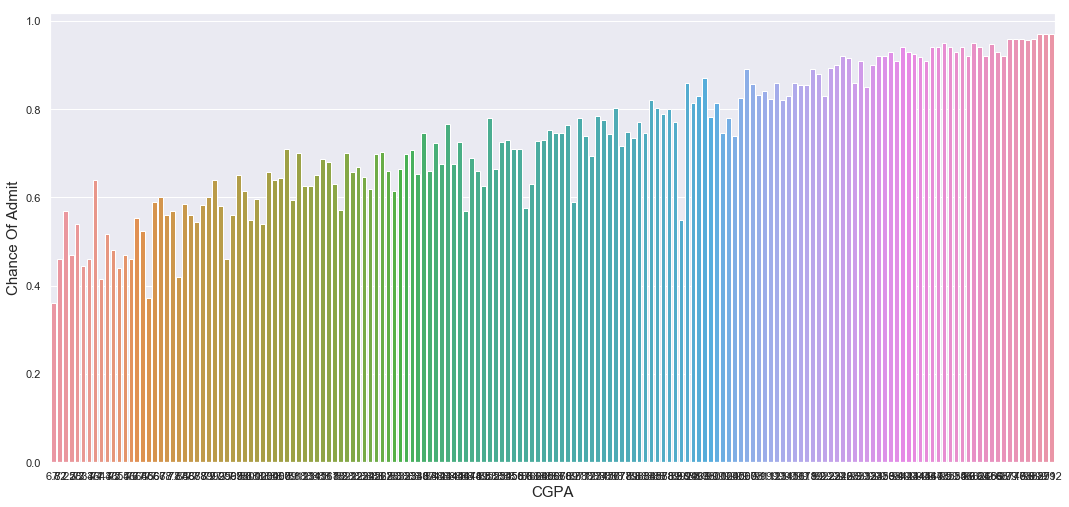

In [179]:
sns.set(rc={'figure.figsize':(18,8.27)})
sns.barplot(x="CGPA", y="Chance of Admit ", data=chance_admit_cgpa)
plt.xlabel('CGPA', fontsize=15)
plt.ylabel('Chance Of Admit', fontsize=15)

In [180]:
#CGPA Minimum
clean_data['CGPA'].min()

6.8

In [181]:
#CGPA MAXIMUM
clean_data['CGPA'].max()

9.92

In [182]:
#Categorizing the CGPA 
clean_data['CGPA_CATEGORY'] = clean_data['CGPA']
bins = [0, 5, 6, 7, 8, 9, 10]
labels = ['FAIL', 'PASS','AVERAGE', 'GOOD', 'EXCELLENT', 'OUTSTANDING']
clean_data['CGPA_CATEGORY'] = pd.cut(clean_data['CGPA_CATEGORY'], bins, labels=labels)

In [183]:
#Categorized CGPA
clean_data['CGPA_CATEGORY'].head()

0    OUTSTANDING
1      EXCELLENT
2           GOOD
3      EXCELLENT
4      EXCELLENT
Name: CGPA_CATEGORY, dtype: category
Categories (6, object): [FAIL < PASS < AVERAGE < GOOD < EXCELLENT < OUTSTANDING]

In [184]:
#Chance of Admit According to Grades
chance_admit_grades = clean_data[['CGPA_CATEGORY','Chance of Admit ']].groupby(['CGPA_CATEGORY'], as_index=False).mean()
chance_admit_grades

,CGPA_CATEGORY,Chance of Admit
0,FAIL,NaN
1,PASS,NaN
2,AVERAGE,0.360000
3,GOOD,0.541515
4,EXCELLENT,0.699773
5,OUTSTANDING,0.882212


In [185]:
#Set 0 for Chance of Admit where data is null or NaN
chance_admit_grades['Chance of Admit '] = np.where(pd.isnull(chance_admit_grades['Chance of Admit ']), 0, chance_admit_grades['Chance of Admit '])

In [186]:
chance_admit_grades

,CGPA_CATEGORY,Chance of Admit
0,FAIL,0.000000
1,PASS,0.000000
2,AVERAGE,0.360000
3,GOOD,0.541515
4,EXCELLENT,0.699773
5,OUTSTANDING,0.882212


Text(0, 0.5, 'Chance Of Admit')

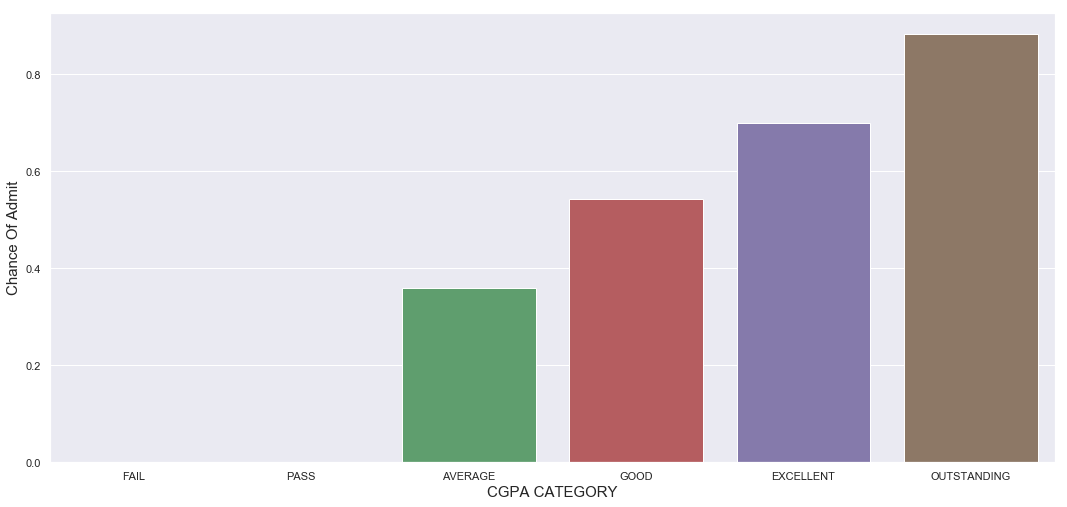

In [187]:
#Visualising the chance of admit according to grades
sns.barplot(x="CGPA_CATEGORY", y="Chance of Admit ", data=chance_admit_grades)
plt.xlabel("CGPA CATEGORY", fontsize=15)
plt.ylabel("Chance Of Admit", fontsize=15)

In [188]:
#Research according to grades
research_wrt_grades = clean_data[['CGPA_CATEGORY', 'Research']].groupby(['CGPA_CATEGORY'], as_index=False).mean()
research_wrt_grades

,CGPA_CATEGORY,Research
0,FAIL,NaN
1,PASS,NaN
2,AVERAGE,1.000000
3,GOOD,0.196970
4,EXCELLENT,0.459091
5,OUTSTANDING,0.920354


In [189]:
#Replacing 0 to Nan or null in Research Column
research_wrt_grades['Research'] = np.where(pd.isnull(research_wrt_grades['Research']), 0, research_wrt_grades['Research'])
research_wrt_grades

,CGPA_CATEGORY,Research
0,FAIL,0.000000
1,PASS,0.000000
2,AVERAGE,1.000000
3,GOOD,0.196970
4,EXCELLENT,0.459091
5,OUTSTANDING,0.920354


Text(0, 0.5, 'Research')

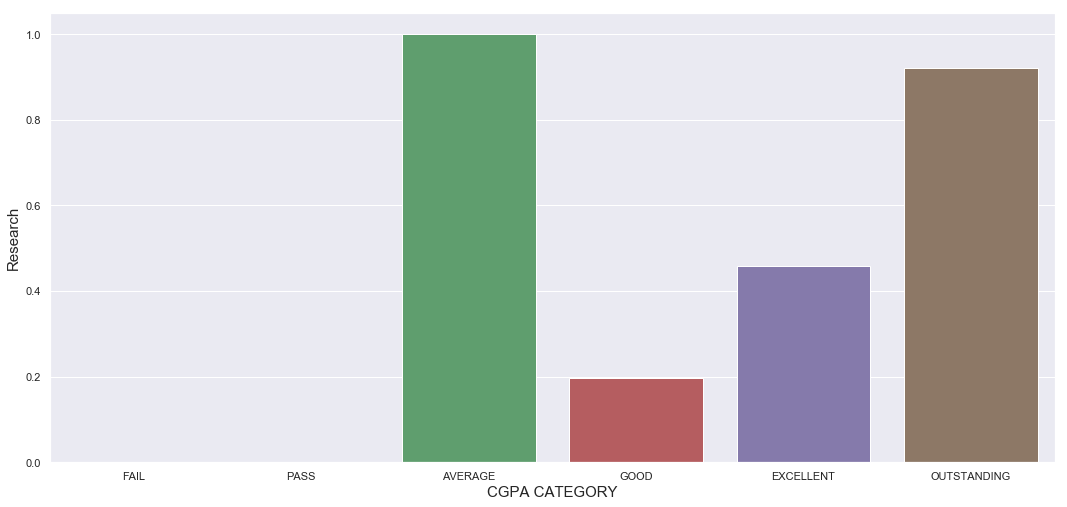

In [190]:
#This shows All Students with Average Grades have research
#Visualising Grades with Research
sns.barplot(x="CGPA_CATEGORY", y="Research", data=research_wrt_grades)
plt.xlabel('CGPA CATEGORY', fontsize=15)
plt.ylabel('Research', fontsize=15)

In [191]:
clean_data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'CGPA_CATEGORY'],
      dtype='object')

In [192]:
#Chance of Admit according to Letter of Recommendation
chance_admit_lor = clean_data[['Chance of Admit ', 'LOR ']].groupby(['LOR '], as_index=False).mean()
chance_admit_lor

,LOR,Chance of Admit
0,1.0,0.420000
1,1.5,0.567143
2,2.0,0.563158
3,2.5,0.632564
4,3.0,0.674235
5,3.5,0.721096
6,4.0,0.776364
7,4.5,0.858444
8,5.0,0.883429


Text(0, 0.5, 'Chance of Admission')

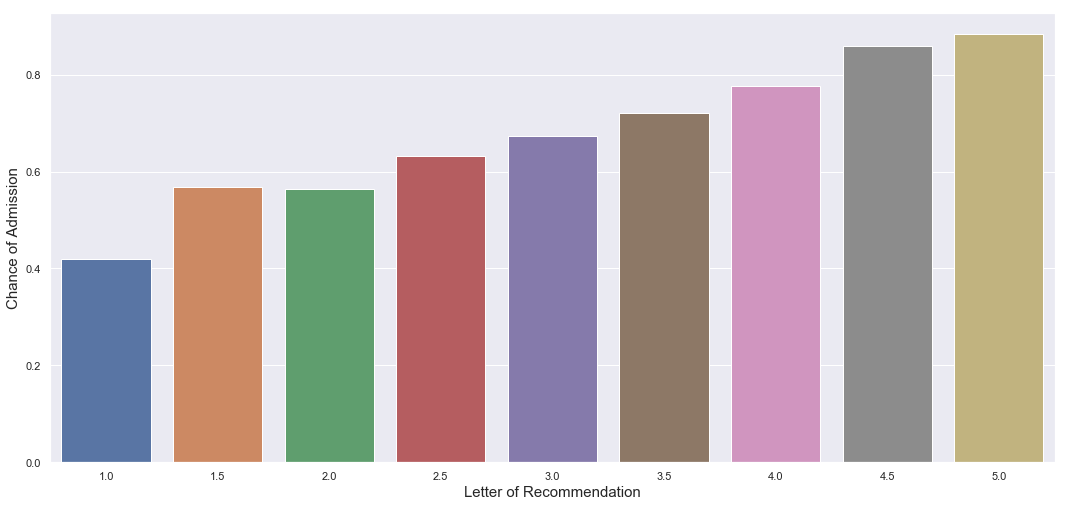

In [193]:
#Visualizing Chance of Admit according to Letter of Recommendation
sns.barplot(x="LOR ", y='Chance of Admit ', data=chance_admit_lor)
plt.xlabel('Letter of Recommendation', fontsize=15)
plt.ylabel('Chance of Admission', fontsize=15)

In [194]:
#Chance of Admit according to Statement of Purpose
chance_admit_purpose = clean_data[['Chance of Admit ', 'SOP']].groupby(['SOP'], as_index=False).mean()
chance_admit_purpose

,SOP,Chance of Admit
0,1.0,0.538333
1,1.5,0.521500
2,2.0,0.602727
3,2.5,0.651277
4,3.0,0.683594
5,3.5,0.713571
6,4.0,0.778000
7,4.5,0.843962
8,5.0,0.883514


Text(0, 0.5, 'Chance of Admission')

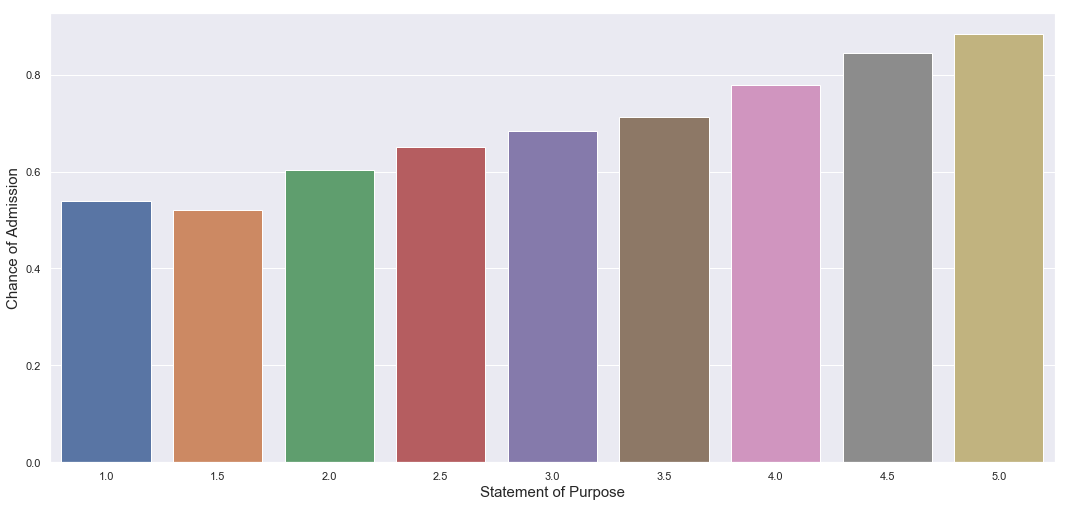

In [195]:
sns.barplot(x="SOP", y="Chance of Admit ", data=chance_admit_purpose)
plt.xlabel('Statement of Purpose', fontsize=15)
plt.ylabel('Chance of Admission', fontsize=15)

In [196]:
#Research University Ratings
research_wrt_uni = clean_data[['University Rating', 'Research']].groupby(['University Rating'], as_index=False).mean()
research_wrt_uni

,University Rating,Research
0,1,0.192308
1,2,0.299065
2,3,0.533835
3,4,0.797297
4,5,0.866667


Text(0, 0.5, 'Research')

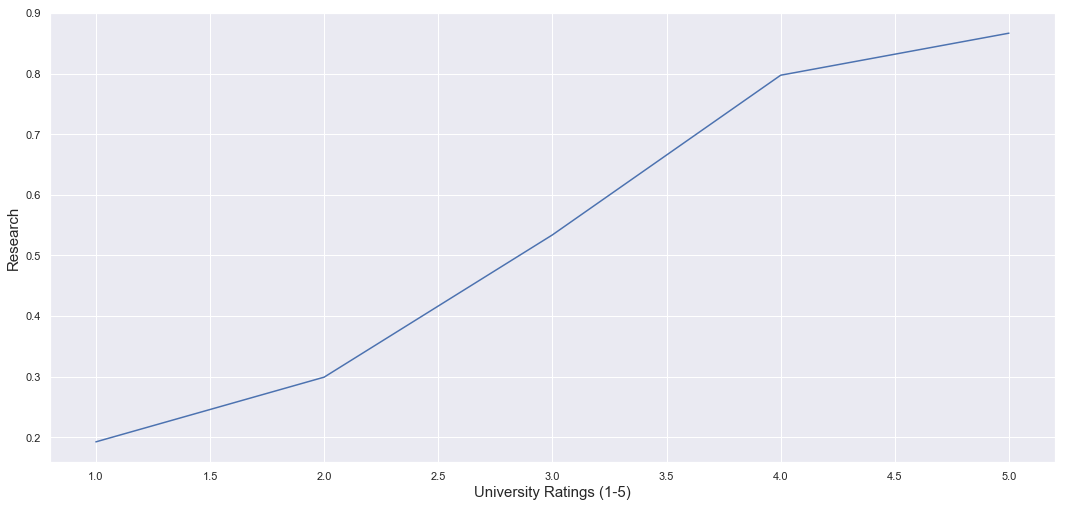

In [197]:
#Clearly shows students with better university have more research
sns.lineplot(x="University Rating", y="Research", data=research_wrt_uni)
plt.xlabel('University Ratings (1-5)', fontsize=15)
plt.ylabel('Research', fontsize=15)

In [198]:
#Universities and CGPA Category
uni_wrt_gpa = clean_data[['University Rating', 'CGPA']].groupby(['University Rating'], as_index=False).mean()
uni_wrt_gpa

,University Rating,CGPA
0,1,7.745769
1,2,8.183738
2,3,8.552256
3,4,9.021622
4,5,9.291167


Text(0, 0.5, 'CGPA')

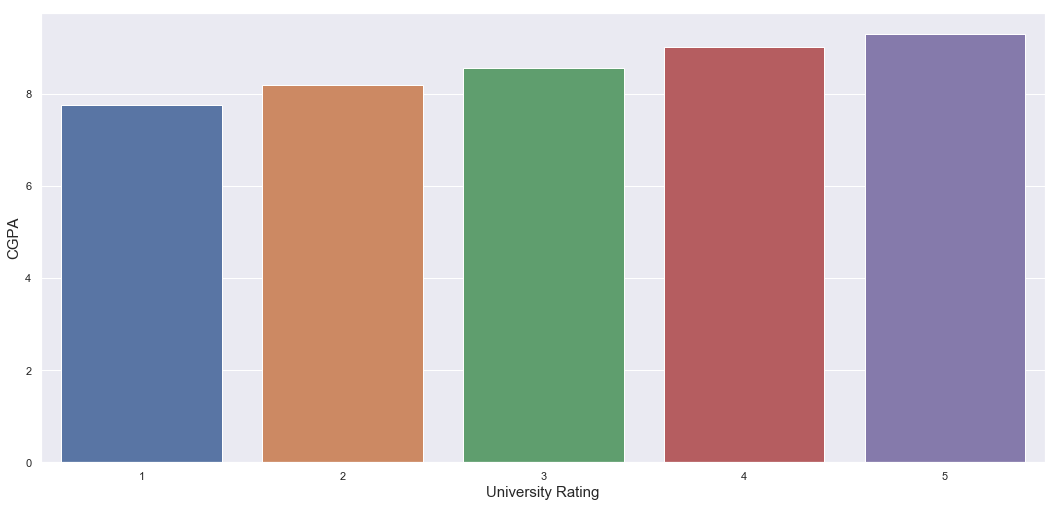

In [199]:
sns.barplot(x="University Rating", y="CGPA", data=uni_wrt_gpa)
plt.xlabel('University Rating', fontsize=15)
plt.ylabel('CGPA', fontsize=15)

In [200]:
#Research with TOEFL Score
research_wrt_toefl = clean_data[['TOEFL Score', 'Research']].groupby(['Research'], as_index=False).mean()
research_wrt_toefl

,Research,TOEFL Score
0,0,104.143646
1,1,110.109589


Text(0, 0.5, 'TOEFL SCORE')

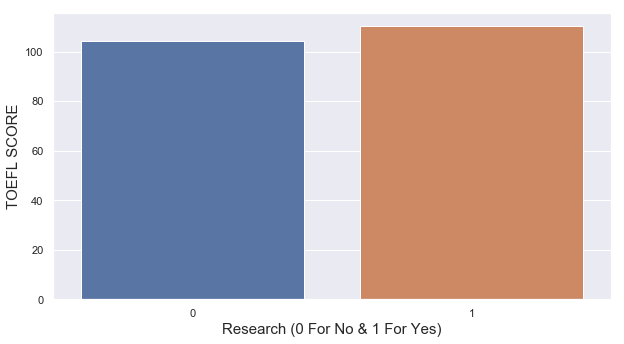

In [201]:
#Averagely Student who has score under 104 or equal to 104 have no research
sns.set(rc={'figure.figsize':(10,5.27)})
sns.barplot(x="Research", y="TOEFL Score", data=research_wrt_toefl)
plt.xlabel('Research (0 For No & 1 For Yes)', fontsize=15)
plt.ylabel('TOEFL SCORE', fontsize=15)

In [202]:
#Research With GRE SCORES
research_wrt_gre = clean_data[['GRE Score', 'Research']].groupby(['Research'], as_index=False).mean()
research_wrt_gre

,Research,GRE Score
0,0,309.491713
1,1,322.853881


Text(0, 0.5, 'GRE SCORES')

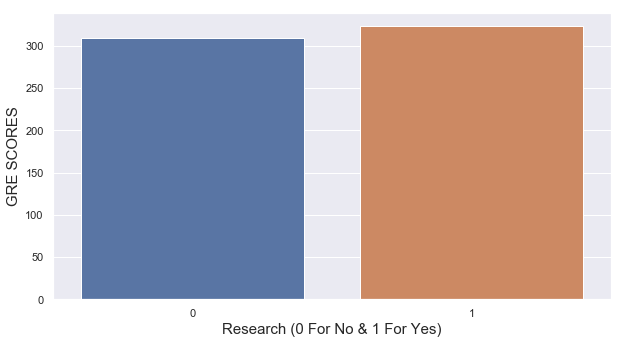

In [203]:
sns.barplot(x="Research", y="GRE Score", data=research_wrt_gre)
plt.xlabel('Research (0 For No & 1 For Yes)', fontsize=15)
plt.ylabel('GRE SCORES', fontsize=15)

In [204]:
#University Rating and Chance of Admission
uni_wrt_admission = clean_data[['University Rating', 'Chance of Admit ']].groupby(['University Rating'], as_index=False).mean()
uni_wrt_admission

,University Rating,Chance of Admit
0,1,0.548077
1,2,0.625981
2,3,0.711880
3,4,0.818108
4,5,0.888167


Text(0, 0.5, 'Chance Of Admission')

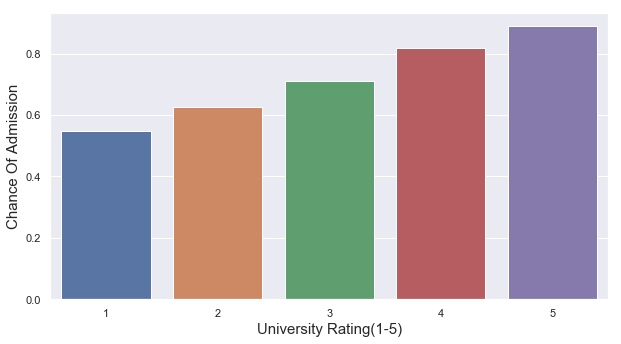

In [205]:
#Student from better university have better chance for admission
sns.barplot(x="University Rating", y="Chance of Admit ", data=uni_wrt_admission)
plt.xlabel('University Rating(1-5)', fontsize=15)
plt.ylabel('Chance Of Admission', fontsize=15)

In [206]:
#Gre Score and TOEFL SCORES and Research Comparision
gre_toefl_research = clean_data[['GRE Score', 'TOEFL Score', 'Research']].groupby(['Research'], as_index=False).mean()
gre_toefl_research

,Research,GRE Score,TOEFL Score
0,0,309.491713,104.143646
1,1,322.853881,110.109589


In [207]:
pd.isnull(clean_data).sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
CGPA_CATEGORY        0
dtype: int64

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
clean_data['CGPA_CATEGORY'].unique()

[OUTSTANDING, EXCELLENT, GOOD, AVERAGE]
Categories (4, object): [AVERAGE < GOOD < EXCELLENT < OUTSTANDING]

In [210]:
cgpa_category_mapping = {
    "FAIL": 0,
    "PASS": 1,
    "AVERAGE": 2,
    "GOOD": 3,
    "EXCELLENT": 4,
    "OUTSTANDING": 5
}

In [211]:
clean_data['CGPA_CATEGORY'] = clean_data['CGPA_CATEGORY'].map(cgpa_category_mapping) 

In [212]:
#Check if any data is null
print(pd.isnull(clean_data).sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
CGPA_CATEGORY        0
dtype: int64


In [411]:
final_data = clean_data

In [412]:
final_data = final_data.drop(['CGPA_CATEGORY'], axis=1)

In [413]:
y = final_data['Chance of Admit ']

In [414]:
X = final_data.drop(['Chance of Admit '], axis=1)

In [415]:
from sklearn.preprocessing import MinMaxScaler

In [416]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [418]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [419]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [427]:
linear_reg = model.score(X_test, y_test)
linear_reg

0.8003159611553717

In [428]:
from sklearn.tree import DecisionTreeRegressor

In [429]:
decision_tree_model = DecisionTreeRegressor(random_state=100)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [430]:
decision_tree_reg = decision_tree_model.score(X_test, y_test)
decision_tree_reg

0.5587069851991924

In [431]:
from sklearn.ensemble import RandomForestRegressor

In [432]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=0)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [441]:
random_forest_reg = random_forest_model.score(X_test, y_test)
random_forest_reg

0.7649522783274212

In [442]:
collective_models = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree Regression' ,'Random Forest Regression'],
    'Score': [linear_reg, decision_tree_reg, random_forest_reg]
})

In [446]:
collective_models.sort_values(by='Score', ascending=False)

,Model,Score
0,Linear Regression,0.800316
2,Random Forest Regression,0.764952
1,Decision Tree Regression,0.558707
